# Graded Project

Machine Learning - Unsupervised Learning

Domain:
○ E-commerce
Business Context:
● Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.
● Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.
● Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people
Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)
Attribute Information:
SL.No Attribute Description
1. user_id a unique id for the customer
2. item_id unique product id
3. weight weight measurement of customer
4. rented for purpose clothing was rented for
5. body type body type of customer
6. review_text review given by the customer
7. size the standardized size of the product
8. rating rating for the product
9. age age of the customer
10. category the category of the product
11. bust size bust measurement of customer
12. height height of the customer
13. review_date date when the review was written
14. fit fit feedback 
Data Citation:
● Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics
for Product Size Recommendation in Metric Spaces". RecSys, 2018.
● Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of
Machine Learning". 2021.
Project Objective:
Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.

 Import the required libraries and load the data: [ Score: 3 point ]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

1. Load the required libraries and read the dataset. (1)


In [2]:
df = pd.read_csv('renttherunway.csv')
# Display the first 5 rows of the dataframe
print(df.head(5))

   Unnamed: 0 fitting  user_id bust size  item_id  weight  rating  \
0           0     fit   420272       34d  2260466  137lbs    10.0   
1           1     fit   273551       34b   153475  132lbs    10.0   
2           2     fit   360448       NaN  1063761     NaN    10.0   
3           3     fit   909926       34c   126335  135lbs     8.0   
4           4     fit   151944       34b   616682  145lbs    10.0   

      rented for                                        review_text  \
0       vacation  An adorable romper! Belt and zipper were a lit...   
1          other  I rented this dress for a photo shoot. The the...   
2          party  This hugged in all the right places! It was a ...   
3  formal affair  I rented this for my company's black tie award...   
4        wedding  I have always been petite in my upper body and...   

           body type                                     review_summary  \
0          hourglass                               So many compliments!   
1  strai

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2)

In [3]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)
# Check the info of the dataset
print("\nInformation about the dataset:")
print(df.info())

Shape of the dataset: (192544, 16)

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fitting         192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  ob

● Data cleansing and Exploratory data analysis: [ Score: 20 point ]

3. Check if there are any duplicate records in the dataset? If any, drop them.(1)


In [4]:
# Checking any duplicate rows
duplicate_rows = df.duplicated()

if duplicate_rows.any():
    print("Duplicate rows found.")

    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

    # Checking after dropping duplicates
    print("Shape of the DataFrame after dropping duplicates:")
    print(df.shape)
else:
    print("No duplicate rows found.")

No duplicate rows found.


4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)

In [5]:
#Identify
redundant_columns = ['user_id','review_text','review_summary']
# Dropping the redundant columns
df = df.drop(redundant_columns, axis=1)
print("Columns after dropping redundant columns:")
print(df.columns)
df.to_csv("renttherunway_modified.csv", index=False)
#saving to the modified file 

Columns after dropping redundant columns:
Index(['Unnamed: 0', 'fitting', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'body type', 'category', 'height', 'size', 'age',
       'review_date'],
      dtype='object')


5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [6]:
is_string_weight = df['weight'].str.endswith('lbs')

if is_string_weight.any():
    print("The 'weight' column contains string data with the suffix 'lbs'.")

    # Removing the lbs suffix to convert into float
    df['weight'] = df['weight'].apply(lambda x: float(x.replace('lbs', '')) if pd.notnull(x) else x)
    print("String 'weight' data removed and converted to float.")
else:
    print("The 'weight' column does not contain any string data with the suffix 'lbs'.")


The 'weight' column contains string data with the suffix 'lbs'.
String 'weight' data removed and converted to float.


6.Check the unique categories for the column 'rented for' and group 'party:
cocktail' category with 'party'.

In [7]:
# Checking the unique categories
unique_rented_for = df['rented for'].unique()
print("Unique categories in 'rented for' column:")
print(unique_rented_for)

df['rented for'] = df['rented for'].replace('party: cocktail', 'party')

#Verifying
updated_unique_rented_for = df['rented for'].unique()
print("\nUpdated unique categories in 'rented for' column:")
print(updated_unique_rented_for)
df.to_csv("renttherunway_modified.csv", index=False)

Unique categories in 'rented for' column:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']

Updated unique categories in 'rented for' column:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan]


7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)

In [8]:
#function to convert height from feet to inches
def feet_to_inches(height):
    try:
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches.strip('"'))
        total_inches = (feet * 12) + inches
        return float(total_inches)
    except:
        return None
#conversion function
df['height'] = df['height'].apply(feet_to_inches)
print(df['height'])


0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64


8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

In [ ]:
#percentage of missing values
missing_percentages = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:\n")
print(missing_percentages)

# Treating missing values
df_dropped = df.dropna()

df_filled = df.fillna(0)  # Replacing missing values with 0

df_mean_filled = df.fillna(df.mean())  # Replacing missing values with column mean

df.to_csv('renttherunway_modified.csv', index=False)


Percentage of missing values:

Unnamed: 0         0.000000
fitting            0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64


9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)


In [14]:
# To print out statistical Summary of the dataset
print("Statistical summary of the dataset:")
print(df.describe())

Statistical summary of the dataset:
          Unnamed: 0       item_id         weight         rating  \
count  192544.000000  1.925440e+05  162562.000000  192462.000000   
mean    96271.500000  1.045684e+06     137.391709       9.092371   
std     55582.809453  8.053148e+05      21.899967       1.430044   
min         0.000000  1.233730e+05      50.000000       2.000000   
25%     48135.750000  1.950760e+05     123.000000       8.000000   
50%     96271.500000  9.483960e+05     135.000000      10.000000   
75%    144407.250000  1.678888e+06     148.000000      10.000000   
max    192543.000000  2.966087e+06     300.000000      10.000000   

              height           size            age  
count  191867.000000  192544.000000  191584.000000  
mean       65.310621      12.245175      33.871017  
std         2.663480       8.494877       8.058083  
min        54.000000       0.000000       0.000000  
25%        63.000000       8.000000      29.000000  
50%        65.000000      12.0000

In [15]:
#numerical columns
numerical_summary = df.describe()

#categorical columns
categorical_summary = {}
for column in df.select_dtypes(include='object'):
    categorical_summary[column] = df[column].value_counts()

#Display of the Numerical and Categorical Colummns
print("Statistical Summary for Numerical Columns:")
print(numerical_summary)

print("\nStatistical Summary for Categorical Columns:")
for column, value_counts in categorical_summary.items():
    print(f"\nColumn: {column}")
    print(value_counts)


Statistical Summary for Numerical Columns:
          Unnamed: 0       item_id         weight         rating  \
count  192544.000000  1.925440e+05  162562.000000  192462.000000   
mean    96271.500000  1.045684e+06     137.391709       9.092371   
std     55582.809453  8.053148e+05      21.899967       1.430044   
min         0.000000  1.233730e+05      50.000000       2.000000   
25%     48135.750000  1.950760e+05     123.000000       8.000000   
50%     96271.500000  9.483960e+05     135.000000      10.000000   
75%    144407.250000  1.678888e+06     148.000000      10.000000   
max    192543.000000  2.966087e+06     300.000000      10.000000   

              height           size            age  
count  191867.000000  192544.000000  191584.000000  
mean       65.310621      12.245175      33.871017  
std         2.663480       8.494877       8.058083  
min        54.000000       0.000000       0.000000  
25%        63.000000       8.000000      29.000000  
50%        65.000000      

10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)

In [17]:
# Data Preprocessing - Convert 'age' column to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Detect outliers in IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['age'] < lower_bound) | (df['age'] > upper_bound)

#Treating outliers
median_age = df['age'].median()
df.loc[outliers, 'age'] = median_age

#Verifying
print("Outliers in 'age' column:")
print(df[outliers])

print("\nTreated 'age' column:")
print(df['age'])


Outliers in 'age' column:
        Unnamed: 0 fitting bust size  item_id  weight  rating     rented for  \
38              38     fit       34b  2251739   120.0    10.0       everyday   
47              47     fit       36d  1312996   190.0    10.0  formal affair   
72              72   large       34d   126335   128.0    10.0  formal affair   
99              99     fit       36c   838983   175.0    10.0          party   
134            134     fit       32a  1453669   110.0    10.0          party   
...            ...     ...       ...      ...     ...     ...            ...   
192309      192309     fit       36a  2082667   120.0    10.0          party   
192325      192325   large       32b   303978   124.0     8.0           work   
192347      192347     fit       32d   156607   125.0     8.0          party   
192387      192387     fit       34a  1859884   118.0    10.0          party   
192460      192460   small       34d  1316404   115.0     8.0          party   

             

11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

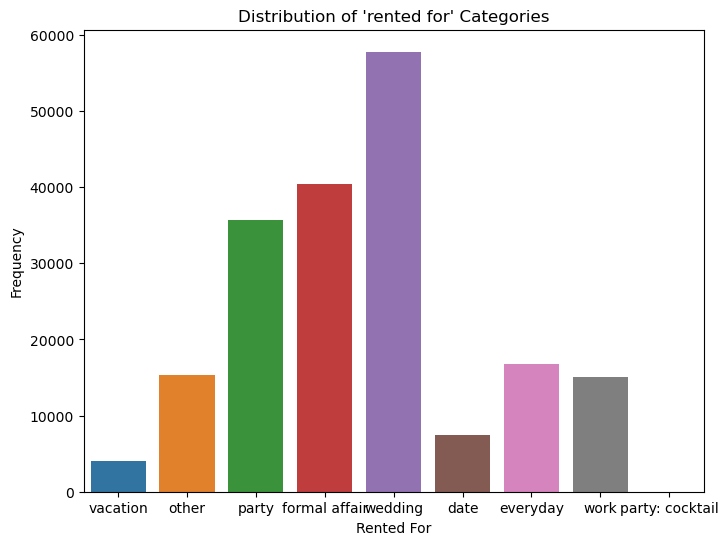

In [46]:
# Distribution of 'rented for' categories
plt.figure(figsize=(8, 6))
sns.countplot(x='rented for', data=df)
plt.title("Distribution of 'rented for' Categories")
plt.xlabel("Rented For")
plt.ylabel("Frequency")
plt.show()


Data Preparation for model building: 

12. Encode the categorical variables in the dataset. (1)


In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns

#LabelEncoder
label_encoder = LabelEncoder()

#encoding to all categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    df.to_csv("renttherunway_modified.csv", index=False)
print(df)


        Unnamed: 0  fitting  bust size  item_id  weight  rating  rented for  \
0                0        0         39  2260466   137.0    10.0           5   
1                1        0         37   153475   132.0    10.0           3   
2                2        0        106  1063761     NaN    10.0           4   
3                3        0         38   126335   135.0     8.0           2   
4                4        0         37   616682   145.0    10.0           6   
...            ...      ...        ...      ...     ...     ...         ...   
192539      192539        0         41  2252812   140.0    10.0           7   
192540      192540        0         25   682043   100.0    10.0           7   
192541      192541        0         48   683251   135.0     6.0           1   
192542      192542        0         51   126335   165.0    10.0           6   
192543      192543        0         50   127865   155.0    10.0           6   

        body type  category  height  size   age  re

13. Standardize the data, so that the values are within a particular range. (1)

In [19]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
X = df[['fitting', 'bust size', 'item_id', 'weight','rating', 'rented for', 'body type','category', 'height', 'size', 'age', 'review_date'] ]
y = df['Unnamed: 0']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Printing standardized train and test data
print("Standardized train data:")
print(X_train.head())
print("\nStandardized test data:")
print(X_test.head())

Standardized train data:
        fitting  bust size   item_id    weight    rating  rented for  \
28429         1         28  1.162596 -0.475198  0.636387           0   
25964         0         42  2.270994       NaN  0.636387           1   
174301        2         54  2.114348  2.851888 -4.958286           0   
21221         2         38  1.181595       NaN -0.762281           4   
78241         2         50  0.838802  0.573062 -2.160949           0   

        body type  category    height      size       age  review_date  
28429           4        16 -0.118938  0.206036  1.678263          316  
25964           2        61 -0.118938  1.383456 -1.753045         1311  
174301          0        61 -0.869106  0.206036 -0.418647          635  
21221           4        44  0.256146  0.912488 -1.562416         2033  
78241           1        16  0.631230  0.441520 -1.181160          878  

Standardized test data:
        fitting  bust size   item_id    weight    rating  rented for  \
36249  

Principal Component Analysis and Clustering: 

14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. 

In [21]:
#Encoding the target columns from string values 
target_column = 'fitting'
df[target_column] = df[target_column].replace({'fit': 0, 'small': 1,'large':2})
target_column1 = 'rented for'
df[target_column1] = df[target_column1].replace({'vacation': 0, 'party': 1,'formal affair':2,'wedding':3,'date':4,'everyday':5,'work':6,'other':7})
target_column2 = 'body type'
df[target_column2] = df[target_column2].replace({'hourglass': 0, 'straight & narrow': 1,'pear':2 ,'athletic':3,'full bust':4,'petite':5})

df.to_csv("renttherunway_modified.csv", index=False)
print(df)

        Unnamed: 0  fitting  bust size  item_id  weight  rating  rented for  \
0                0        0         39  2260466   137.0    10.0           5   
1                1        0         37   153475   132.0    10.0           3   
2                2        0        106  1063761     NaN    10.0           4   
3                3        0         38   126335   135.0     8.0           2   
4                4        0         37   616682   145.0    10.0           6   
...            ...      ...        ...      ...     ...     ...         ...   
192539      192539        0         41  2252812   140.0    10.0           7   
192540      192540        0         25   682043   100.0    10.0           7   
192541      192541        0         48   683251   135.0     6.0           1   
192542      192542        0         51   126335   165.0    10.0           6   
192543      192543        0         50   127865   155.0    10.0           6   

        body type  category  height  size   age  re

In [22]:
#Label Encoding the other target columns 
data = pd.read_csv('renttherunway_modified.csv')
label_encoder = LabelEncoder()
data['bust size'] = label_encoder.fit_transform(data['bust size'])
data['weight'] = label_encoder.fit_transform(data['weight'])
data['height'] = label_encoder.fit_transform(data['height'])

# Saving the encoded column to a new .csv file
data.to_csv('renttherunway_modified.csv', index=False)

#Printing sample data
print("Original data:")
print(data[['bust size','weight','height',]])
print("\nEncoded data:")
print(data[['bust size', 'weight','height']])


Original data:
        bust size  weight  height
0              39      57      14
1              37      52      12
2             106     190      10
3              38      55      11
4              37      65      15
...           ...     ...     ...
192539         41      60      15
192540         25      20       7
192541         48      55      14
192542         51      85      12
192543         50      75      12

[192544 rows x 3 columns]

Encoded data:
        bust size  weight  height
0              39      57      14
1              37      52      12
2             106     190      10
3              38      55      11
4              37      65      15
...           ...     ...     ...
192539         41      60      15
192540         25      20       7
192541         48      55      14
192542         51      85      12
192543         50      75      12

[192544 rows x 3 columns]


In [24]:
#PCA ANALYSIS
csv_file_path = 'renttherunway_modified.csv'
df = pd.read_csv(csv_file_path)
df.fillna(df.mean(), inplace=True)
# Extract the features (X)
X = df.values

# Data Preparation
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#  PCA object
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)

# 'PCA Result' 
print("PCA Result:")
print(pca_result)
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

PCA Result:
[[-0.25058592  1.58242427]
 [-0.46131601 -0.97787108]
 [ 1.39225765  0.67984312]
 ...
 [-0.27073788  0.01897189]
 [ 0.50930525 -1.72280921]
 [ 0.54664542 -1.37699819]]
Explained Variance Ratio:
[0.14755967 0.10280378]


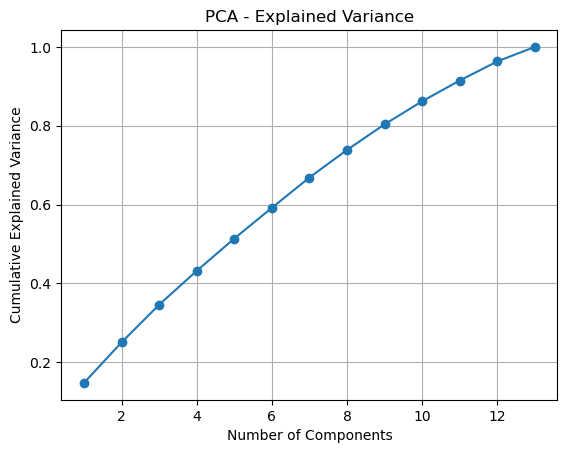

Number of PCA components to explain 95.0% of the variance: 12


In [33]:
data = pd.read_csv('renttherunway_modified.csv')
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Calculate the cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# components that explain 90-95% of the variance
threshold = 0.95 
num_components = np.argmax(cumulative_variance >= threshold) + 1

# Plotting the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

print(f"Number of PCA components to explain {threshold*100:.1f}% of the variance: {num_components}")


15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)

a.Find the optimal K Value using elbow plot for K Means clustering.

b. Build a Kmeans clustering model using the obtained optimal K value
from the elbow plot.

c. Compute silhouette score for evaluating the quality of the K Means
clustering technique.

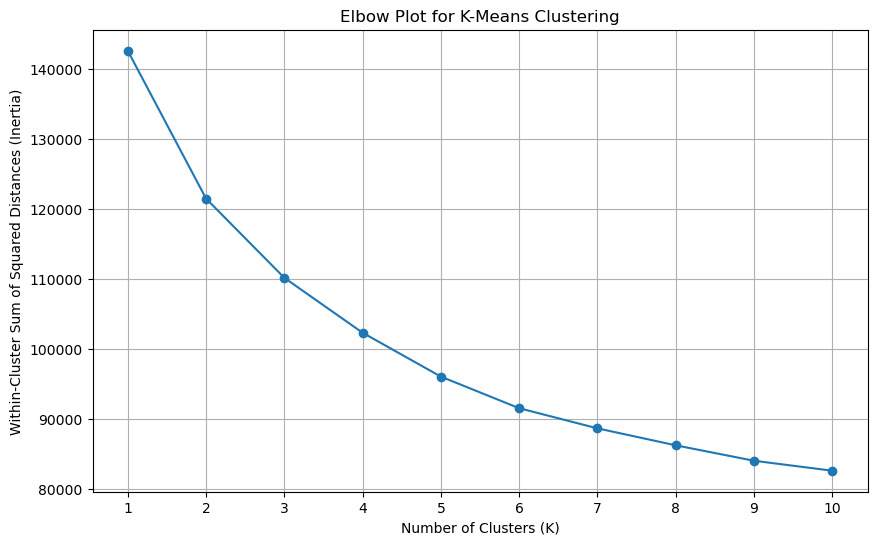

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Read the data from the .csv file
data = pd.read_csv('renttherunway_modified.csv')

# dropping rows with missing values
data = data.dropna()
X = data.drop(columns=['rating'])  

# Filtering out because of Value Error NaN, infinity, and large values
X = X[np.isfinite(X).all(1)]  

# data preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

# To find the optimal K value
inertia_values = []
K_values = range(1, 11)  # Try K values from 1 to 10
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squared Distances (Inertia)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(K_values)
plt.grid(True)
plt.show()


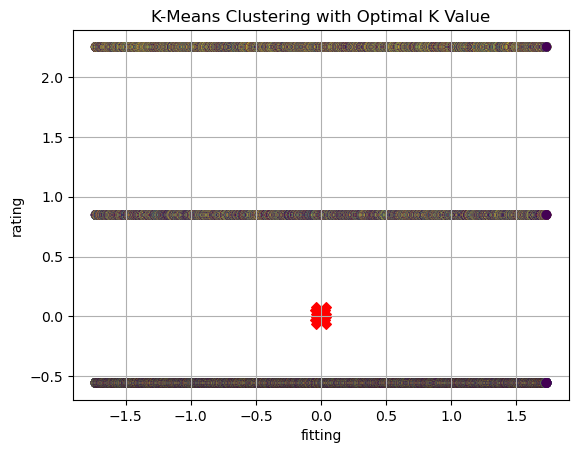

In [42]:
#ANSWER B
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data 
data = pd.read_csv('renttherunway_modified.csv')

#Standardizing the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing optimal value of K and choosing KMeans Clustering Model
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#cluster labels to the original dataframe and visualisation
data['Cluster'] = clusters
selected_feature1 = 'fitting'  
selected_feature2 = 'rating'  

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel(selected_feature1)
plt.ylabel(selected_feature2)
plt.title('K-Means Clustering with Optimal K Value')
plt.grid()
plt.show()


C.Compute silhouette score for evaluating the quality of the K Means
clustering technique

In [1]:

data = pd.read_csv('renttherunway_modified.csv')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Determine the optimal K value 
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(scaled_data)

# Compute the silhouette score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.17138528087411206


16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8)

a. Find the optimal K Value using dendrogram for Agglomerative clustering.

b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.

c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)

a. Find the optimal K Value using dendrogram for Agglomerative clustering.

In [2]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


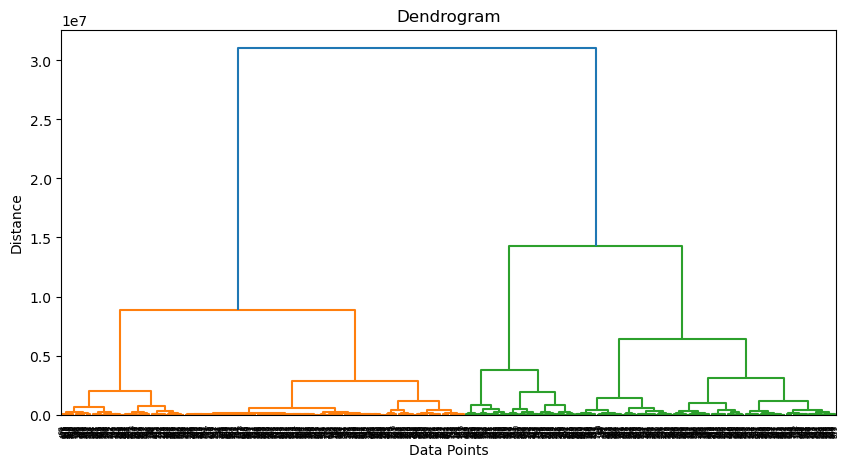

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('renttherunway_modified.csv',nrows = 1000)
data = data.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
data = data.dropna()

# Calculating the linkage matrix using Agglomerative clustering
linkage_matrix = linkage(data, method='ward')

# dendrogram to visualize 
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

# Agglomerative clustering with the optimal K value
# Assuming the optimal K value is 3 
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(data)


b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.

     fitting  rating  category
0          0    10.0        44
1          0    10.0        20
2          0    10.0        45
3          0     8.0        16
4          0    10.0        20
..       ...     ...       ...
995        0    10.0        16
996        1     8.0         0
997        0    10.0        61
998        0     4.0        16
999        0    10.0        16

[996 rows x 3 columns]


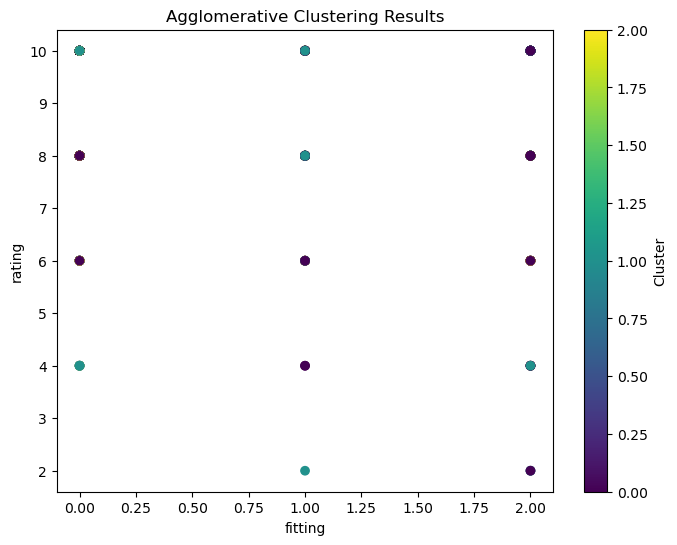

In [4]:
# Add the cluster assignments to the df
data['Cluster'] = clusters

# Display the clusters
print(data[['fitting', 'rating', 'category']])  # Replace 'Feature1' and 'Feature2' with your actual feature columns

#visualizations 
plt.figure(figsize=(8, 6))
plt.scatter(data['fitting'], data['rating'], c=clusters, cmap='viridis')
plt.xlabel('fitting')
plt.ylabel('rating')
plt.title('Agglomerative Clustering Results')
plt.colorbar(label='Cluster')
plt.show()


C. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('renttherunway_modified.csv',nrows = 1000)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
# to remove value error :ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Determine the optimal K value 
optimal_k = 3
# Build the K-Means clustering model with the optimal K value
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_data)

# Compute the silhouette score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.1724009294282995


17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)

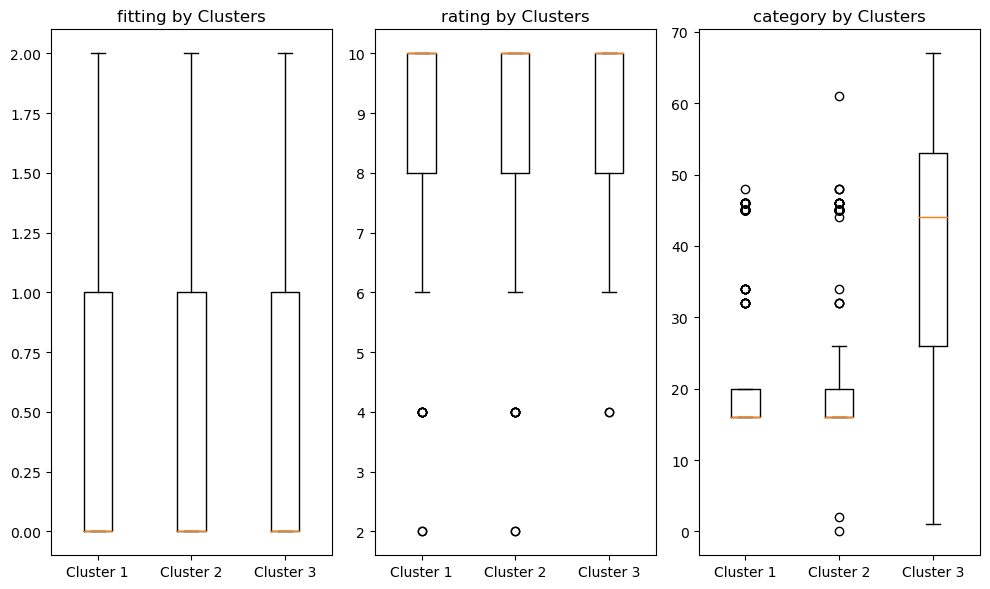

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('renttherunway_modified.csv', nrows=1000)
data = data.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
data = data.dropna()

# Perform Agglomerative clustering with the optimal K value
n_clusters = 3  # Assuming the optimal K value is 3 for this example
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(data)

# Bivariate analysis between cluster labels
selected_features = ['fitting', 'rating', 'category']

# Create df to store the selected features along with the cluster labels
df_selected_features = pd.DataFrame(data[selected_features])
df_selected_features['Cluster'] = clusters

# Visualize using box plots
plt.figure(figsize=(10, 6))
for feature in selected_features:
    plt.subplot(1, len(selected_features), selected_features.index(feature) + 1)
    plt.boxplot([df_selected_features[feature][df_selected_features['Cluster'] == c] for c in range(n_clusters)],
                labels=[f'Cluster {c + 1}' for c in range(n_clusters)])
    plt.title(f'{feature} by Clusters')
plt.tight_layout()
plt.show()
